### LAB 6. NUMPY

In [1]:
import numpy as np

import plotly.graph_objects as go
from numba import njit
import numpy as np
import matplotlib.pyplot as plt

###  №1-1. 

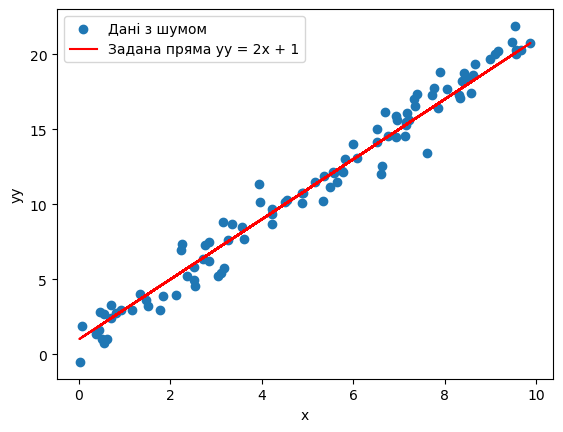

In [2]:
k = 2
b = 1

num_points = 100
x = np.random.uniform(0, 10, num_points)

noise = np.random.normal(0, 1, num_points)

def f(x):
    y = k * x + b + noise
    return y

y = f(x)

plt.scatter(x, y, label='Дані з шумом')
plt.plot(x, k * x + b, color='red', label='Задана пряма yy = 2x + 1')
plt.xlabel('x')
plt.ylabel('yy')
plt.legend()
plt.show()


### №1-2. Least Square Method

In [3]:
def least_square_method(x, y):
    
    mean_x, mean_y = np.mean(x), np.mean(y)

    numer = np.sum((x - mean_x) * (y - mean_y))
    denom = np.sum((x - mean_x)**2)

    m = numer / denom
    c = mean_y - k * mean_x

    return m, c

### №1-3. Compare found parameters with the estimate of np.polyfit(x,y,1) and with the initial parameters of the line 

In [4]:
m, c = least_square_method(x, y)
m, c

(2.082777598886042, 1.0448634928326186)

In [5]:
np.polyfit(x, y, 1)

array([2.0827776 , 0.63121019])

### №1-4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.


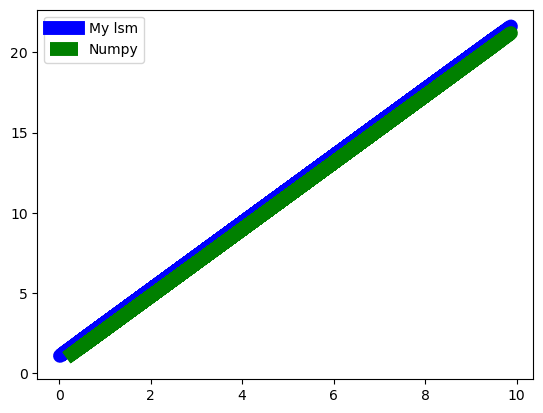

In [6]:
my_b1, my_b0 = least_square_method(x, y)
np_b1, np_b0 = np.polyfit(x, y, 1)
#plot_dot(10)
lw_ = 10
plt.plot(x, my_b1 * x + my_b0, label="My lsm", lw=lw_, color='blue')
plt.plot(x, np_b1 * x + np_b0, label="Numpy", lw=lw_, ls='--', color='green')
plt.legend()

# norm result?

### №2-1. Gradient descent 

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок kk� та bb�. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [7]:
def gradient_descent(
    gradient, start=np.array([0.0]), learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

In [8]:
def gradient(x):
    return 2

result = gradient_descent(gradient)

print("Optimal x:", result)
print("Optimal y:", 2 * result + 1) 


Optimal x: [-10.]
Optimal y: [-19.]
